# Exercício 1 - CBPF

### Nesse exercício, irei explorar o arquivo fits fornecido. Primeiro, irei importar as bibliotecas necessárias.

In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn
import os

### Abrir o arquivo de dados utilizando o astropy:

In [2]:
hdul = fits.open("legacy_dr8_class.fits", ignore_missing_end=True)

In [3]:
type(hdul)

astropy.io.fits.hdu.hdulist.HDUList

A seguir, algumas informações sobre a lista HDU (Header Data Unit).

In [4]:
hdul.info()

Filename: legacy_dr8_class.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (1362,)   uint8   
  1  D:\Dropbox\class_data\legacy_dr8.fits#1    1 BinTableHDU     56   203484R x 22C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [5]:
hdul[0]

In [6]:
hdul[0].header

SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    1 / Text string                                    
NAXIS1  =                 1362 / Number of characters                           
VOTMETA =                    T / Table metadata in VOTable format               
EXTEND  =                    T / There are standard extensions                  
COMMENT                                                                         
COMMENT The data in this primary HDU consists of bytes which                    
COMMENT comprise a VOTABLE document.                                            
COMMENT The VOTable describes the metadata of the table contained               
COMMENT in the following BINTABLE extension.                                    
COMMENT Such a BINTABLE extension can be used on its own as a perfectly         
COMMENT good table, but the 

In [7]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  176 / width of table in bytes                        
NAXIS2  =               203484 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   22 / number of columns                              
EXTNAME = 'D:\Dropbox\class_data\legacy_dr8.fits#1' / table name                
TTYPE1  = 'ra      '           / label for column 1                             
TFORM1  = 'D       '           / format for column 1                            
TTYPE2  = 'dec     '           / label for column 2                             
TFORM2  = 'D       '        

In [8]:
data0 = hdul[0].data

In [9]:
data1 = hdul[1].data

In [10]:
type(data0)

numpy.ndarray

In [11]:
type(data1)

astropy.io.fits.fitsrec.FITS_rec

In [12]:
data0.shape # table extensions can't be the first extension, so there's a dummy image extension at 0

(1362,)

In [13]:
data1.shape

(203484,)

### Gerando a tabela:

In [14]:
table_a = Table(data1)

In [15]:
type(table_a)

astropy.table.table.Table

Algumas informações sobre a tabela:

In [16]:
table_a

ra,dec,MAG_R,MAG_G,MAG_Z,MAG_W1,MAG_W2,MAG_W3,MAG_W4,MAGErr_R,MAGErr_G,MAGErr_Z,MAGErr_W1,MAGErr_W2,MAGErr_W3,MAGErr_W4,z,zErr,zmin,zmax,z_spec,training
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
219.08289517954503,34.62503563674176,22.280200958251953,23.840595245361328,20.66927719116211,19.442676544189453,19.876930236816406,16.879316329956055,nan,0.06806910037994385,0.18660935759544373,0.01964740641415119,0.030202750116586685,0.10241585224866867,0.11477607488632202,-0.0759001150727272,0.778901219367981,0.08070003986358643,0.7025620341300964,0.8639621138572693,-99.0,0.0
219.018686653907,34.62537369835652,20.950979232788086,22.239498138427734,20.180450439453125,19.764698028564453,20.02762222290039,18.840682983398438,nan,0.020584318786859512,0.05090845748782158,0.015757206827402115,0.04087268188595772,0.1184769868850708,0.706566572189331,-0.7996485233306885,0.33551111817359924,0.05468936264514923,0.28844860196113586,0.3978273272514343,-99.0,0.0
218.9763831277981,34.626465741964694,18.89073944091797,20.20539665222168,18.109525680541992,18.055065155029297,18.447738647460938,nan,nan,0.005011069122701883,0.011482541449368,0.0034725747536867857,0.009082990698516369,0.029333235695958138,-9.551554679870605,-0.6828519701957703,0.21968227624893188,0.01073453575372696,0.209060937166214,0.2305300086736679,0.20600000023841858,1.0
218.92461988134852,34.62559613136096,20.60637092590332,21.781631469726562,19.691598892211914,19.00655746459961,19.443334579467773,20.748811721801758,nan,0.020479494705796242,0.04327033460140228,0.017061179503798485,0.021253490820527077,0.07182589173316956,4.317370414733887,-0.8430752158164978,0.542923092842102,0.05138787627220154,0.4858550429344177,0.5886307954788208,-99.0,0.0
219.10422528282172,34.62584794653823,20.372390747070312,21.050525665283203,20.042388916015625,20.373193740844727,20.97327423095703,19.442487716674805,17.46992301940918,0.018710194155573845,0.025213653221726418,0.022851288318634033,0.07867170870304108,0.3042357563972473,1.281699299812317,1.7885087728500366,0.22720582783222198,0.033312372863292694,0.19105462729930878,0.25767937302589417,-99.0,0.0
219.1401551191026,34.63060062779776,21.168203353881836,22.17804718017578,20.70537757873535,20.669546127319336,21.462276458740234,18.50033187866211,nan,0.026804154738783836,0.050823792815208435,0.02964233234524727,0.09588156640529633,0.44736987352371216,0.5076057314872742,-0.840893566608429,0.4622515141963959,0.06538459658622742,0.3857685327529907,0.5165377259254456,-99.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221.30998851742496,35.03107476388605,20.579233169555664,22.316905975341797,19.539865493774414,18.657052993774414,19.20832633972168,nan,19.94881820678711,0.03436385467648506,0.07112767547369003,0.02719735912978649,0.015554540790617466,0.05826186388731003,-4.076931953430176,19.238523483276367,0.48827993869781494,0.038879990577697754,0.4588622450828552,0.5366222262382507,-99.0,0.0
221.30899510953466,35.02957290846069,22.453113555908203,25.050060272216797,20.602703094482422,19.193769454956055,19.6783447265625,nan,17.728694915771484,0.1109761893749237,0.6832901835441589,0.042926765978336334,0.02449021488428116,0.08757002651691437,-1.8948737382888794,2.4689102172851562,0.8793555498123169,0.07168042659759521,0.8045992255210876,0.9479600787162781,-99.0,0.0


In [17]:
table_a.columns

<TableColumns names=('ra','dec','MAG_R','MAG_G','MAG_Z','MAG_W1','MAG_W2','MAG_W3','MAG_W4','MAGErr_R','MAGErr_G','MAGErr_Z','MAGErr_W1','MAGErr_W2','MAGErr_W3','MAGErr_W4','z','zErr','zmin','zmax','z_spec','training')>

In [18]:
type(table_a.columns)

astropy.table.table.TableColumns

In [19]:
table_a.colnames

['ra',
 'dec',
 'MAG_R',
 'MAG_G',
 'MAG_Z',
 'MAG_W1',
 'MAG_W2',
 'MAG_W3',
 'MAG_W4',
 'MAGErr_R',
 'MAGErr_G',
 'MAGErr_Z',
 'MAGErr_W1',
 'MAGErr_W2',
 'MAGErr_W3',
 'MAGErr_W4',
 'z',
 'zErr',
 'zmin',
 'zmax',
 'z_spec',
 'training']

In [20]:
type(table_a.colnames)

list

In [21]:
table_a.meta

OrderedDict()

In [22]:
len(table_a)

203484

### Convertendo a tabela para um dataframe do Pandas

In [23]:
df = table_a.to_pandas()

In [24]:
df

,ra,dec,MAG_R,MAG_G,MAG_Z,MAG_W1,MAG_W2,MAG_W3,MAG_W4,MAGErr_R,...,MAGErr_W1,MAGErr_W2,MAGErr_W3,MAGErr_W4,z,zErr,zmin,zmax,z_spec,training
0,219.082895,34.625036,22.280201,23.840595,20.669277,19.442677,19.876930,16.879316,NaN,0.068069,...,0.030203,0.102416,0.114776,-0.075900,0.778901,0.080700,0.702562,0.863962,-99.000,0.0
1,219.018687,34.625374,20.950979,22.239498,20.180450,19.764698,20.027622,18.840683,NaN,0.020584,...,0.040873,0.118477,0.706567,-0.799649,0.335511,0.054689,0.288449,0.397827,-99.000,0.0
2,218.976383,34.626466,18.890739,20.205397,18.109526,18.055065,18.447739,NaN,NaN,0.005011,...,0.009083,0.029333,-9.551555,-0.682852,0.219682,0.010735,0.209061,0.230530,0.206,1.0
3,218.924620,34.625596,20.606371,21.781631,19.691599,19.006557,19.443335,20.748812,NaN,0.020479,...,0.021253,0.071826,4.317370,-0.843075,0.542923,0.051388,0.485855,0.588631,-99.000,0.0
4,219.104225,34.625848,20.372391,21.050526,20.042389,20.373194,20.973274,19.442488,17.469923,0.018710,...,0.078672,0.304236,1.281699,1.788509,0.227206,0.033312,0.191055,0.257679,-99.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203479,221.384627,35.031304,20.289848,22.006527,19.473064,18.800829,19.199001,22.347729,NaN,0.023790,...,0.017453,0.056976,18.655874,-0.504265,0.399513,0.029692,0.371137,0.430521,-99.000,0.0
203480,221.267106,35.032654,22.278854,24.686527,21.332008,20.327465,21.582365,NaN,15.524459,0.155021,...,0.070509,0.506848,-0.115952,0.318850,0.525794,0.076385,0.445291,0.598062,-99.000,0.0
203481,221.357931,35.031956,21.256090,22.794085,20.244637,18.834969,19.022402,17.893970,16.110783,0.057986,...,0.018522,0.049890,0.324572,0.561515,0.497148,0.061960,0.444781,0.568702,-99.000,0.0
203482,221.140035,35.031835,20.928772,22.810913,19.648155,18.766457,19.179871,NaN,NaN,0.033461,...,0.016835,0.056150,-1.286056,-0.460461,0.561410,0.034761,0.527032,0.596554,-99.000,0.0


### Plotando os dados 

<function matplotlib.pyplot.show(close=None, block=None)>

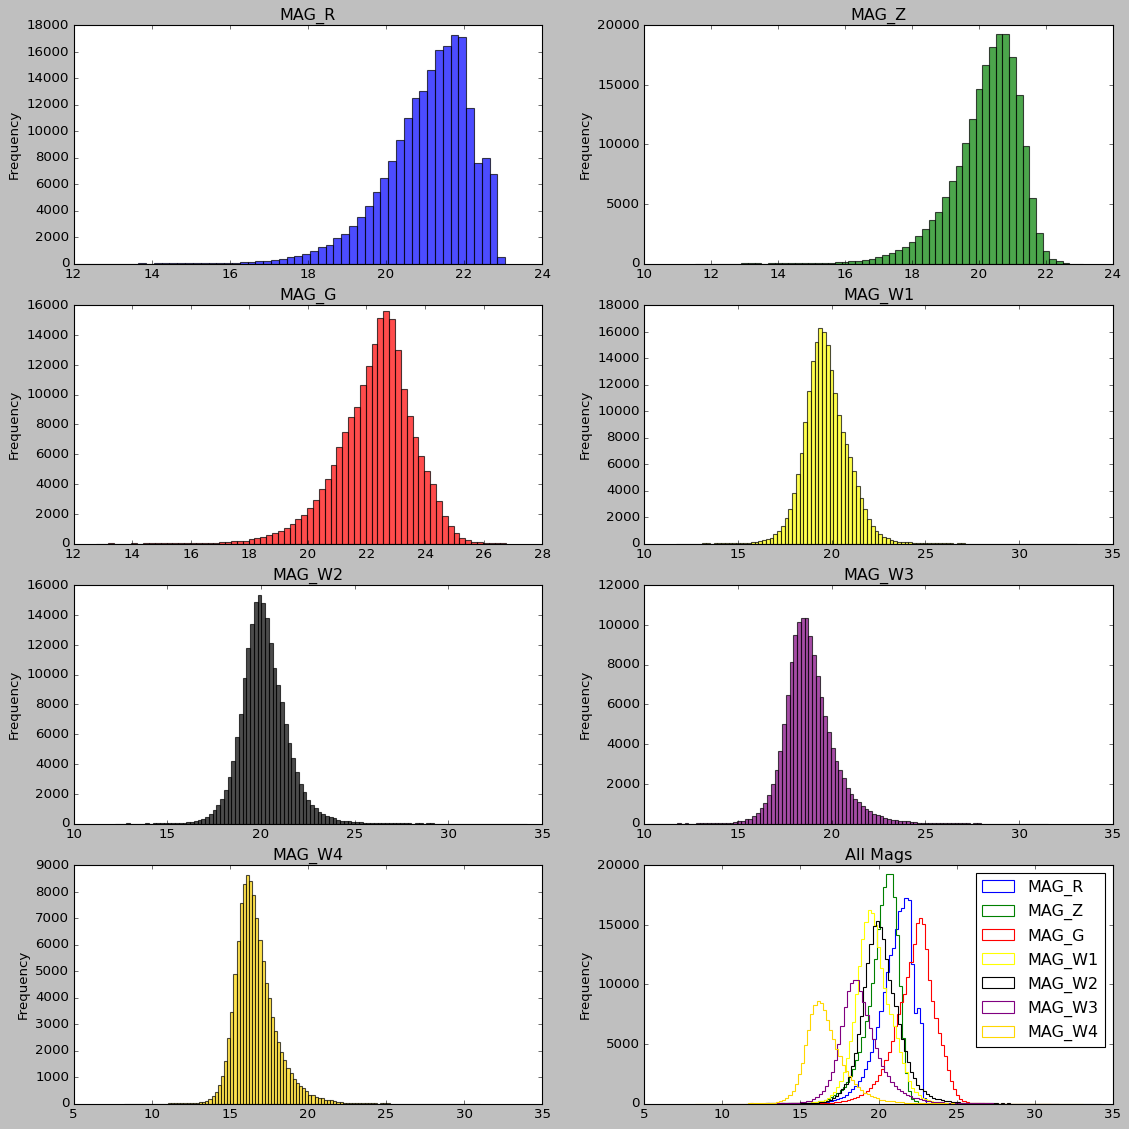

In [25]:
# Definição de algumas variáveis úteis para o plot:
data = table_a
### MAG PLOTS
BANDS = ["R","Z", "G", "W1", "W2", "W3", "W4"]
mags = ['MAG_'+band for band in BANDS]
key_list = mags 
color_list = ['blue', 'green', 'red', 'yellow', 'black', "purple", "gold"]

# Criando uma figura para conter o subplot:
hor = 2
ver = 4

plt.style.use('classic')

fig = plt.figure(figsize=(14, 14), constrained_layout=True)
# matplotlib.pyplot.figure(num=None, figsize=None, constrained_layout=bool)
# If True use constrained layout to adjust positioning of plot elements.

gs = fig.add_gridspec(ver, hor, left=0.05, right=0.5, wspace=0.05)
#Specifies the geometry of the grid that a subplot will be placed. The number of rows and 
#number of columns of the grid need to be set. Optionally, the subplot layout parameters
#(e.g., left, right, etc.) can be tuned.

# Definindo uma função para especificar o ínicio e fim de cada barra e fazendo o plot.

i=0
binsize=0.2
def binarange(arr, binsize):
    return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize)
#Começa no valor mínimo contido na coluna, termina no valor máximo mais a largura, e dá passos de acordo com
#a largura definida.

#Example
#binarange(data.field("MAG_R"), binsize)

for v in range(ver):
    for h in range(hor):
        if v==(ver-1):
            ax = fig.add_subplot(gs[v, 0])
            bins = binarange(data.field(key_list[i]), binsize)
            ax = df[key_list[i]].plot.hist(bins=bins, color=color_list[i], alpha=0.7)
            ax.set_title(key_list[i])
            
            ax = fig.add_subplot(gs[v, 1])
            for c, key in enumerate(key_list):
                bins = binarange(data.field(key), binsize)
                ax = df[key].plot.hist(bins=bins, color=color_list[c], alpha=1, label=key, histtype='step')
            ax.set_title("All Mags")
            plt.legend()
            break
            i+=1
                 
        mags = ['MAG_'+band for band in BANDS]
    
        ax = fig.add_subplot(gs[v, h])
        bins = binarange(data.field(key_list[i]), binsize)
        ax = df[key_list[i]].plot.hist(bins=bins, color=color_list[i], alpha=0.7)
        ax.set_title(key_list[i])
        i+=1

plt.show

# Resolução do Exercício

Primeiramente, farei a subtração das colunas da tabela.

In [26]:
table_b = table_a[['MAG_R','MAG_G','MAG_Z','MAG_W1','MAG_W2','MAG_W3','MAG_W4']]

In [27]:
df_b = table_b.to_pandas()

In [28]:
diff_b = df_b.diff(axis=1)

In [29]:
diff_b = diff_b.drop(columns=['MAG_R'])

In [30]:
diff_b = diff_b.rename(columns={'MAG_G': 'DIF_GR', 'MAG_Z': 'DIF_ZG', 'MAG_W1': 'DIF_W1Z', 'MAG_W2': 'DIF_W2W1', 'MAG_W3': 'DIF_W3W2', 'MAG_W4': 'DIF_W4W3'})

<function matplotlib.pyplot.show(close=None, block=None)>

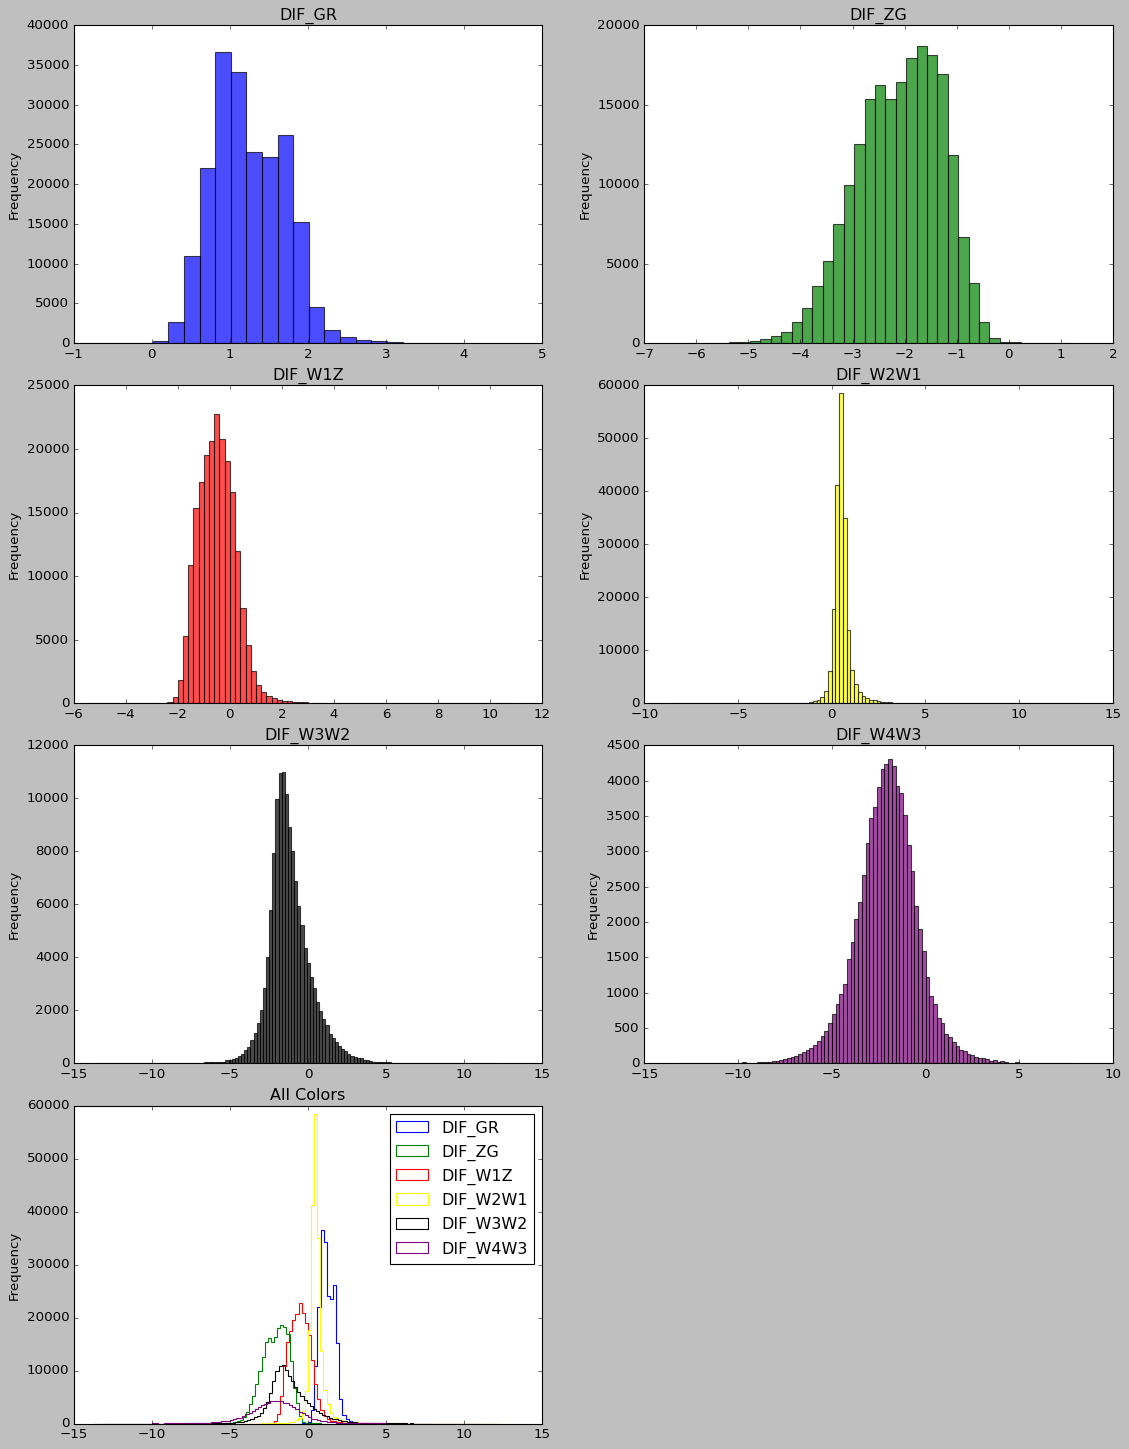

In [31]:
data = Table.from_pandas(diff_b)
### COLOR PLOTS
BANDS = ["GR","ZG", "W1Z", "W2W1", "W3W2", "W4W3"]
mags = ['DIF_'+band for band in BANDS]
key_list = mags 
color_list = ['blue', 'green', 'red', 'yellow', 'black', "purple"]

# Criando uma figura para conter o subplot:
hor = 2
ver = 4

plt.style.use('classic')

fig = plt.figure(figsize=(14, 18), constrained_layout=True)
# matplotlib.pyplot.figure(num=None, figsize=None, constrained_layout=bool)
# If True use constrained layout to adjust positioning of plot elements.

gs = fig.add_gridspec(ver, hor, left=0.05, right=0.5, wspace=0.05)
#Specifies the geometry of the grid that a subplot will be placed. The number of rows and 
#number of columns of the grid need to be set. Optionally, the subplot layout parameters
#(e.g., left, right, etc.) can be tuned.


# Definindo uma função para especificar o ínicio e fim de cada barra e fazendo o plot.

i=0
binsize=0.2
def binarange(arr, binsize):
    return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize)
#Começa no valor mínimo contido na coluna, termina no valor máximo mais a largura, e dá passos de acordo com
#a largura definida.

#Example
#binarange(data.field("MAG_R"), binsize)

for v in range(ver):
    for h in range(hor):
        if v==(ver-1):
           
            ax = fig.add_subplot(gs[v, 0])
            for c, key in enumerate(key_list):
                bins = binarange(data.field(key), binsize)
                ax = diff_b[key].plot.hist(bins=bins, color=color_list[c], alpha=1, label=key, histtype='step')
            ax.set_title("All Colors")
            plt.legend()
            break
            i+=1
                 
        mags = ['MAG_'+band for band in BANDS]
    
        ax = fig.add_subplot(gs[v, h])
        bins = binarange(data.field(key_list[i]), binsize)
        ax = diff_b[key_list[i]].plot.hist(bins=bins, color=color_list[i], alpha=0.7)
        ax.set_title(key_list[i])
        i+=1

plt.show

Agora, tem-se que salvar em um arquivo fits.

In [32]:
new_df1 = pd.concat([df, diff_b], axis=1)

In [33]:
new_df1

,ra,dec,MAG_R,MAG_G,MAG_Z,MAG_W1,MAG_W2,MAG_W3,MAG_W4,MAGErr_R,...,zmin,zmax,z_spec,training,DIF_GR,DIF_ZG,DIF_W1Z,DIF_W2W1,DIF_W3W2,DIF_W4W3
0,219.082895,34.625036,22.280201,23.840595,20.669277,19.442677,19.876930,16.879316,NaN,0.068069,...,0.702562,0.863962,-99.000,0.0,1.560394,-3.171318,-1.226601,0.434254,-2.997614,NaN
1,219.018687,34.625374,20.950979,22.239498,20.180450,19.764698,20.027622,18.840683,NaN,0.020584,...,0.288449,0.397827,-99.000,0.0,1.288519,-2.059048,-0.415752,0.262924,-1.186939,NaN
2,218.976383,34.626466,18.890739,20.205397,18.109526,18.055065,18.447739,NaN,NaN,0.005011,...,0.209061,0.230530,0.206,1.0,1.314657,-2.095871,-0.054461,0.392673,NaN,NaN
3,218.924620,34.625596,20.606371,21.781631,19.691599,19.006557,19.443335,20.748812,NaN,0.020479,...,0.485855,0.588631,-99.000,0.0,1.175261,-2.090033,-0.685041,0.436777,1.305477,NaN
4,219.104225,34.625848,20.372391,21.050526,20.042389,20.373194,20.973274,19.442488,17.469923,0.018710,...,0.191055,0.257679,-99.000,0.0,0.678135,-1.008137,0.330805,0.600080,-1.530787,-1.972565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203479,221.384627,35.031304,20.289848,22.006527,19.473064,18.800829,19.199001,22.347729,NaN,0.023790,...,0.371137,0.430521,-99.000,0.0,1.716679,-2.533463,-0.672235,0.398172,3.148727,NaN
203480,221.267106,35.032654,22.278854,24.686527,21.332008,20.327465,21.582365,NaN,15.524459,0.155021,...,0.445291,0.598062,-99.000,0.0,2.407673,-3.354519,-1.004543,1.254900,NaN,NaN
203481,221.357931,35.031956,21.256090,22.794085,20.244637,18.834969,19.022402,17.893970,16.110783,0.057986,...,0.444781,0.568702,-99.000,0.0,1.537994,-2.549448,-1.409668,0.187433,-1.128431,-1.783188
203482,221.140035,35.031835,20.928772,22.810913,19.648155,18.766457,19.179871,NaN,NaN,0.033461,...,0.527032,0.596554,-99.000,0.0,1.882141,-3.162758,-0.881699,0.413414,NaN,NaN


Salvando em um arquivo fits:

In [43]:
new_table1 = Table.from_pandas(new_df1)
tabela_exercicio_1 = os.path.join("arquivosgerados",'NewLegacyCatalog.fits')
hdu = fits.BinTableHDU(data=new_table1)
hdu.writeto(tabela_exercicio_1, overwrite=True)


In [44]:
hdul = fits.open("arquivosgerados/NewLegacyCatalog.fits", ignore_missing_end=True)

In [45]:
data = hdul[1].data # table extensions can't be the first extension, so there's a dummy image extension at 1
cat_table = Table(data)
cols=cat_table.columns
print(cat_table)
print(cols)

        ra                dec         ...       DIF_W4W3     
------------------ ------------------ ... -------------------
219.08289517954503  34.62503563674176 ...                 nan
  219.018686653907  34.62537369835652 ...                 nan
 218.9763831277981 34.626465741964694 ...                 nan
218.92461988134852  34.62559613136096 ...                 nan
219.10422528282172  34.62584794653823 ...  -1.972564697265625
 219.1401551191026  34.63060062779776 ...                 nan
219.07940419061788   34.6265108832743 ...                 nan
               ...                ... ...                 ...
221.30998851742496  35.03107476388605 ...                 nan
221.30899510953466  35.02957290846069 ...                 nan
 221.3846269372925  35.03130360684637 ...                 nan
221.26710586697644  35.03265425222566 ...                 nan
221.35793083937708   35.0319557953791 ... -1.7831878662109375
221.14003466677406 35.031834870454304 ...                 nan
221.3061